In [1]:
import sys
sys.path.append("../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

import glob
import os
from datetime import datetime
import time
import math
from tqdm import tqdm

from itertools import repeat
from torch.nn.parameter import Parameter
import collections
import matplotlib
from torch_utils import *
from ExplicitModels import *
from visualization import *
# matplotlib.use('Agg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.0,), std=(1.0,))])

mnist_dset_train = torchvision.datasets.MNIST('./data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=20, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('./data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=20, shuffle=False, num_workers=0)

In [4]:
activation_type = "sigmoid"
architecture = [784, 500, 500, 10]

x,y = next(iter(train_loader))
x = x.view(x.size(0),-1).to(device).T
y_one_hot = F.one_hot(y, 10).to(device).T

neural_lr_start = 0.1
neural_lr_stop = 0.05
neural_lr_rule = "constant"
neural_lr_decay_multiplier = 0.01
neural_dynamic_iterations = 50

lr_start = {'ff' : 0.001}

model = SupervisedPredictiveCoding(architecture, activation_type)

In [5]:
trn_acc_list = []
tst_acc_list = []

n_epochs = 50
lr = lr_start
for epoch_ in range(n_epochs):
    lr = {'ff' : lr_start['ff'] * (0.9)**epoch_}
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        x = activation_inverse(x.view(x.size(0),-1).T, "sigmoid")
        y_one_hot = F.one_hot(y, 10).to(device).T
        y_one_hot = 0.94 * y_one_hot + 0.03 * torch.ones(*y_one_hot.shape, device = device)
        _ = model.batch_step(  x, y_one_hot, lr, neural_lr_start, neural_lr_stop, neural_lr_rule,
                               neural_lr_decay_multiplier, neural_dynamic_iterations,
                               optimizer = "adam")

    trn_acc = evaluatePC(  model, train_loader, neural_lr_start, neural_lr_stop, neural_lr_rule, 
                           neural_lr_decay_multiplier,
                           neural_dynamic_iterations, device, printing = False)
    tst_acc = evaluatePC(  model, test_loader, neural_lr_start, neural_lr_stop, neural_lr_rule, 
                           neural_lr_decay_multiplier,
                           neural_dynamic_iterations, device, printing = False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

3000it [03:07, 15.98it/s]
2it [00:00, 15.15it/s]

Epoch : 1, Train Accuracy : 0.9455166666666667, Test Accuracy : 0.9397


3000it [02:13, 22.45it/s]
3it [00:00, 28.06it/s]

Epoch : 2, Train Accuracy : 0.97115, Test Accuracy : 0.9636


3000it [01:36, 31.22it/s]
3it [00:00, 29.01it/s]

Epoch : 3, Train Accuracy : 0.9529333333333333, Test Accuracy : 0.9448


3000it [01:35, 31.39it/s]
3it [00:00, 28.31it/s]

Epoch : 4, Train Accuracy : 0.9820333333333333, Test Accuracy : 0.9728


3000it [01:35, 31.26it/s]
3it [00:00, 28.86it/s]

Epoch : 5, Train Accuracy : 0.9835833333333334, Test Accuracy : 0.9732


3000it [01:36, 30.97it/s]
3it [00:00, 28.34it/s]

Epoch : 6, Train Accuracy : 0.9864833333333334, Test Accuracy : 0.9744


3000it [01:36, 31.06it/s]
3it [00:00, 28.19it/s]

Epoch : 7, Train Accuracy : 0.9889833333333333, Test Accuracy : 0.9787


3000it [01:36, 31.21it/s]
3it [00:00, 28.24it/s]

Epoch : 8, Train Accuracy : 0.9901833333333333, Test Accuracy : 0.9772


3000it [01:54, 26.16it/s]
2it [00:00, 14.00it/s]

Epoch : 9, Train Accuracy : 0.9917833333333334, Test Accuracy : 0.9794


3000it [03:18, 15.08it/s]
2it [00:00, 15.29it/s]

Epoch : 10, Train Accuracy : 0.9929666666666667, Test Accuracy : 0.9803


3000it [03:11, 15.64it/s]
2it [00:00, 15.15it/s]

Epoch : 11, Train Accuracy : 0.99335, Test Accuracy : 0.9802


3000it [03:09, 15.79it/s]
3it [00:00, 26.04it/s]

Epoch : 12, Train Accuracy : 0.9946, Test Accuracy : 0.9816


3000it [01:36, 30.97it/s]
3it [00:00, 28.75it/s]

Epoch : 13, Train Accuracy : 0.9951166666666666, Test Accuracy : 0.9813


3000it [01:36, 31.18it/s]
2it [00:00, 16.25it/s]

Epoch : 14, Train Accuracy : 0.9955833333333334, Test Accuracy : 0.9818


3000it [03:14, 15.41it/s]
2it [00:00, 14.35it/s]

Epoch : 15, Train Accuracy : 0.9962666666666666, Test Accuracy : 0.9823


3000it [02:44, 18.21it/s]
3it [00:00, 28.35it/s]

Epoch : 16, Train Accuracy : 0.9968, Test Accuracy : 0.9833


3000it [01:37, 30.86it/s]
3it [00:00, 28.82it/s]

Epoch : 17, Train Accuracy : 0.9967666666666667, Test Accuracy : 0.9826


3000it [01:40, 29.78it/s]
3it [00:00, 28.57it/s]

Epoch : 18, Train Accuracy : 0.9970833333333333, Test Accuracy : 0.983


3000it [01:35, 31.27it/s]
3it [00:00, 28.97it/s]

Epoch : 19, Train Accuracy : 0.9973, Test Accuracy : 0.983


3000it [02:57, 16.89it/s]
2it [00:00, 14.27it/s]

Epoch : 20, Train Accuracy : 0.9973833333333333, Test Accuracy : 0.9821


3000it [01:38, 30.59it/s]
3it [00:00, 28.40it/s]

Epoch : 21, Train Accuracy : 0.9977166666666667, Test Accuracy : 0.9831


3000it [01:35, 31.38it/s]
3it [00:00, 29.13it/s]

Epoch : 22, Train Accuracy : 0.9976833333333334, Test Accuracy : 0.983


3000it [02:15, 22.17it/s]
2it [00:00, 14.66it/s]

Epoch : 23, Train Accuracy : 0.9979, Test Accuracy : 0.9828


3000it [03:11, 15.66it/s]
2it [00:00, 14.10it/s]

Epoch : 24, Train Accuracy : 0.9980666666666667, Test Accuracy : 0.983


3000it [03:13, 15.47it/s]
2it [00:00, 13.47it/s]

Epoch : 25, Train Accuracy : 0.9980666666666667, Test Accuracy : 0.9829


3000it [03:14, 15.39it/s]
2it [00:00, 13.75it/s]

Epoch : 26, Train Accuracy : 0.9981166666666667, Test Accuracy : 0.9832


1063it [01:28, 12.03it/s]


KeyboardInterrupt: 

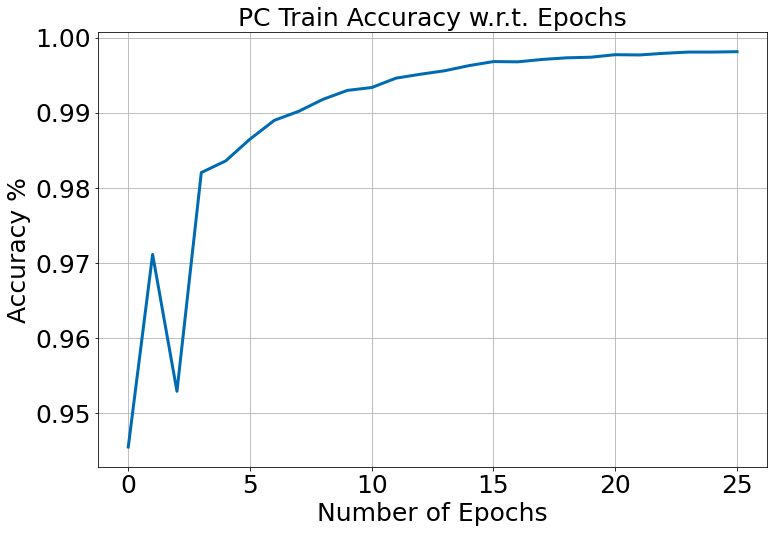

In [6]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'PC Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

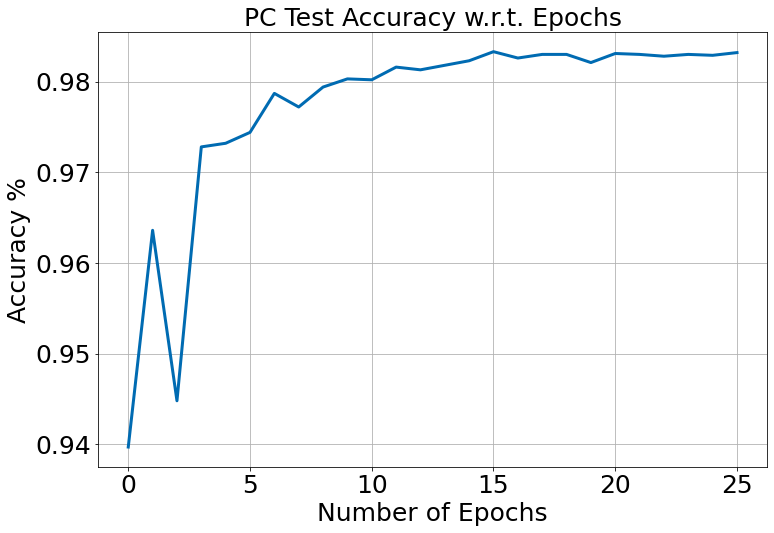

In [7]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'PC Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)